# 1. Problem Statement

The document classification solution should significantly reduce the manual human effort in the HRM. It should achieve a higher level of accuracy and automation with minimal human intervention.

## Importing Libraries

In [1]:
#!pip install textblob
#!pip install wordcloud

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import re  #regular expression

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from textblob import Word
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
from nltk import tokenize
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thila\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thila\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2. Importing DataSet

We have extracted the data from all resume documents and saved in the CSV file. We are going to use the same for further analysis.

In [3]:
resume_data=pd.read_csv("Resume_Data.csv")

# 3. Data Preview and Understanding

In [4]:
#Shape of the data set, No of rows and columns
resume_data.shape

(79, 2)

Observation : Data Set has 79 rows and 3 columns File_Path, Resume_Text and  Category. Data from resume document is stored in Resume_Text column.

# 4. Exploratory data analysis (EDA)

## Summerized Information about Dataset

In [5]:

resume_data.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Resume_Text  79 non-null     object
 1   Category     79 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


Observation : DataSet has 2 columns of string type.

## Missing Values

In [6]:
#check for null values
resume_data.isnull().sum()

Resume_Text    0
Category       0
dtype: int64

Observation : There is no Missing/Null value in any column.

## Duplicate Values

In [7]:
#Count of duplicated rows
resume_data[resume_data.duplicated()].shape

(0, 2)

Observation: No duplicate values in dataset.

## Text Preprocessing

In [8]:
# removing both the leading and the trailing characters such as spaces in tweets
resume_data['Resume_Text'] = [x.strip() for x in resume_data['Resume_Text']]

In [9]:
#Removing spaces in between
resume_data['Resume_Text']=resume_data['Resume_Text'].apply(lambda x: re.sub(r'\s+', " ", x))

In [10]:
#PorterStemmer class is used for stemming process. It basically remove the suffixes from words.
ps = PorterStemmer()

In [11]:
# function to preprocess text
def preprocess(x):


    #To remove special characters and numbers
    #allow a-z A-Z and space character only, other than that replace it with null
    x=re.sub('[^a-zA-Z ]', '', x)

    #converting into lower case characters
    x=x.lower()

    #spiliting
    x=x.split()

    #removing stop words
    x=[word  for word in x if word not in set(stopwords.words('english'))]

    #stemming
    #x=[ps.stem(word) for word in x]
    
    #We can either use stemming or Lemmatization
    
    #Lemmatization
    x=[Word(word).lemmatize() for word in x]
        
    #joining
    x=" ".join(x)
    return x



In [12]:
resume_data['Resume_Text']=resume_data["Resume_Text"].apply(preprocess)


In [13]:
resume_data

,Resume_Text,Category
0,anubhav kumar singh core competency scripting ...,PeopleSoft
1,g ananda rayudu httpswwwlinkedincominanandguda...,PeopleSoft
2,peoplesoft database administrator gangareddy p...,PeopleSoft
3,classification internal classification interna...,PeopleSoft
4,priyanka ramadoss mountpleasant coonoor nilgir...,PeopleSoft
...,...,...
74,workday integration consultant name sri krishn...,WorkDay
75,srikanth workday hcm consultant seeking suitab...,WorkDay
76,workday hcm fcm name kumar s role workday cons...,WorkDay
77,venkateswarlub workday consultant professional...,WorkDay


In [14]:
resume_data.Resume_Text[0]

'anubhav kumar singh core competency scripting shell scripting application peoplesoft hcm financials operating system linux window webapp server weblogic tuxedo rdbms oracle repository github core competency scripting shell scripting application peoplesoft hcm financials operating system linux window webapp server weblogic tuxedo rdbms oracle repository github work globally competitive environment challenging assignment shall yield twin benefit job satisfaction steadypaced professional growth professional experience current hcl current role system admin offshore skill shell scripting linux peoplesoft administration github managing peoplesoft hcm peoplesoft fscm production environment along support environment installed linux window o involved day day activity project migration database refresh system admin change tax update etc troubleshooting various server like application server web server process scheduler server applying tuxedo weblogic middleware cpu patch various application wor

## Data Visualization

### Category wise resumes

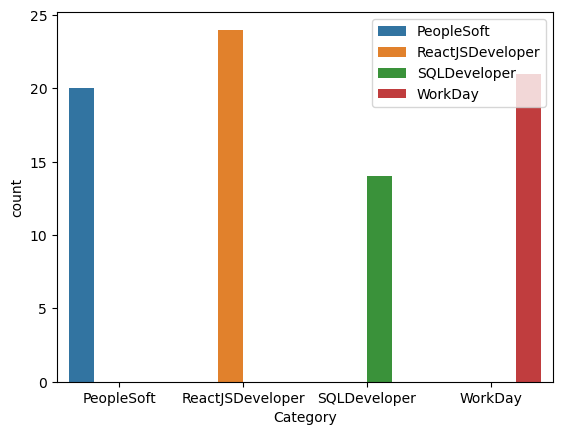

In [15]:
#Bar plot
sns.countplot(x='Category',hue='Category',data=resume_data)
plt.legend(loc=0)
plt.show()

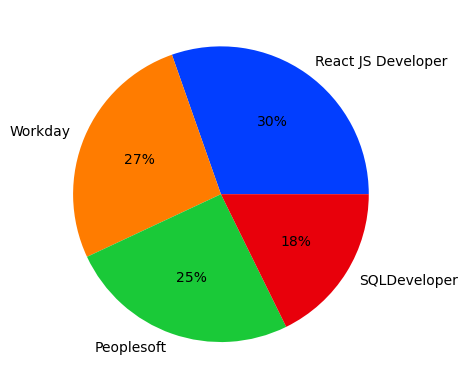

In [16]:
#Pie Chart
# define Seaborn color palette to use
palette_color = sns.color_palette('bright')

# Categorical Column
category=['React JS Developer', 'Workday', 'Peoplesoft', 'SQLDeveloper']
# plotting data on chart
plt.pie(resume_data.Category.value_counts(), labels=category, colors=palette_color, autopct='%.0f%%')

# displaying chart
plt.show()

## CountVectorizer with n-grams

### Bi-grams

In [17]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top2_words = get_top_n2_words(resume_data['Resume_Text'].values, n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

,Bi-gram,Freq
0,application server,121
1,sql server,110
2,process scheduler,106
3,web server,91
4,business process,86
5,people tool,82
6,core connector,77
7,server domain,75
8,calculated field,75
9,custom report,74


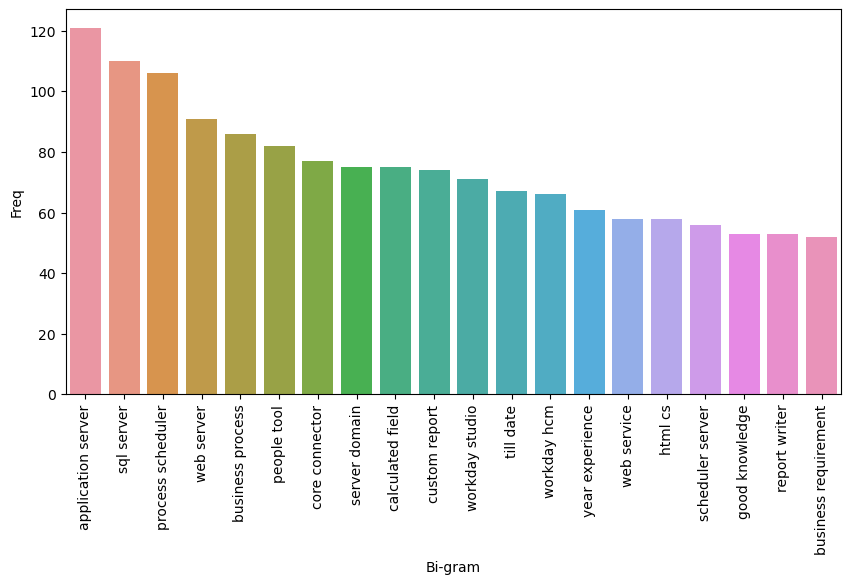

In [18]:
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

### Tri-grams

In [19]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top3_words = get_top_n3_words(resume_data['Resume_Text'].values, n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)

,Tri-gram,Freq
0,process scheduler server,56
1,server web server,44
2,server process scheduler,38
3,application server domain,37
4,server domain process,35
5,domain process scheduler,35
6,application server web,34
7,operating system window,34
8,web server domain,27
9,eib core connector,27


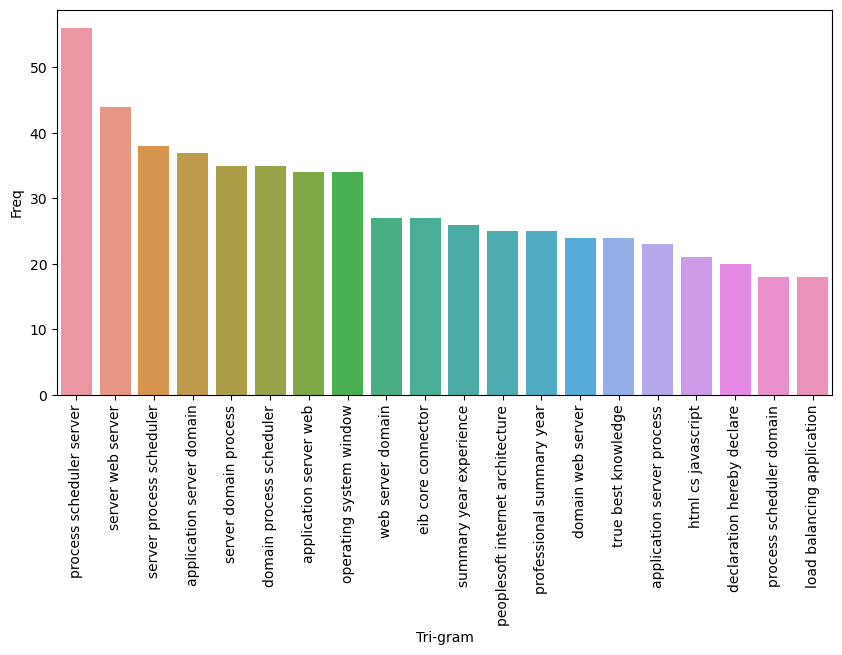

In [20]:
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

## Word Cloud

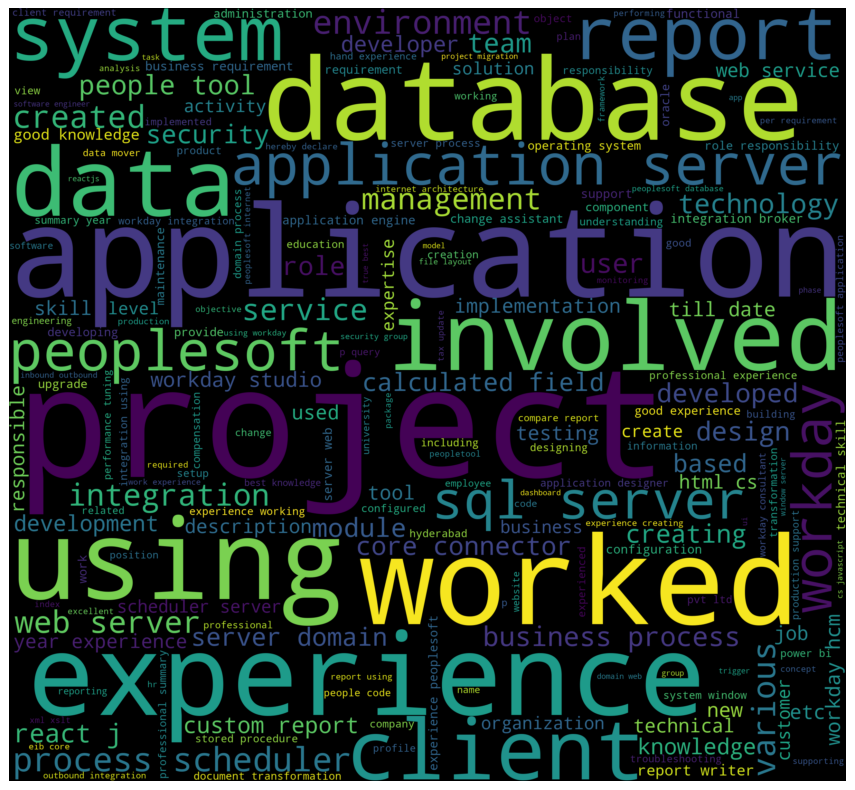

In [21]:
resume_string=" ".join(resume_data['Resume_Text'].values)
wordcloud_resume = WordCloud(
                      background_color='black',
                      width=2600,
                      height=2400
                     ).generate(resume_string)

plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordcloud_resume, interpolation = "bilinear")
plt.axis("off")
plt.show()

### React JS Developer Word Cloud

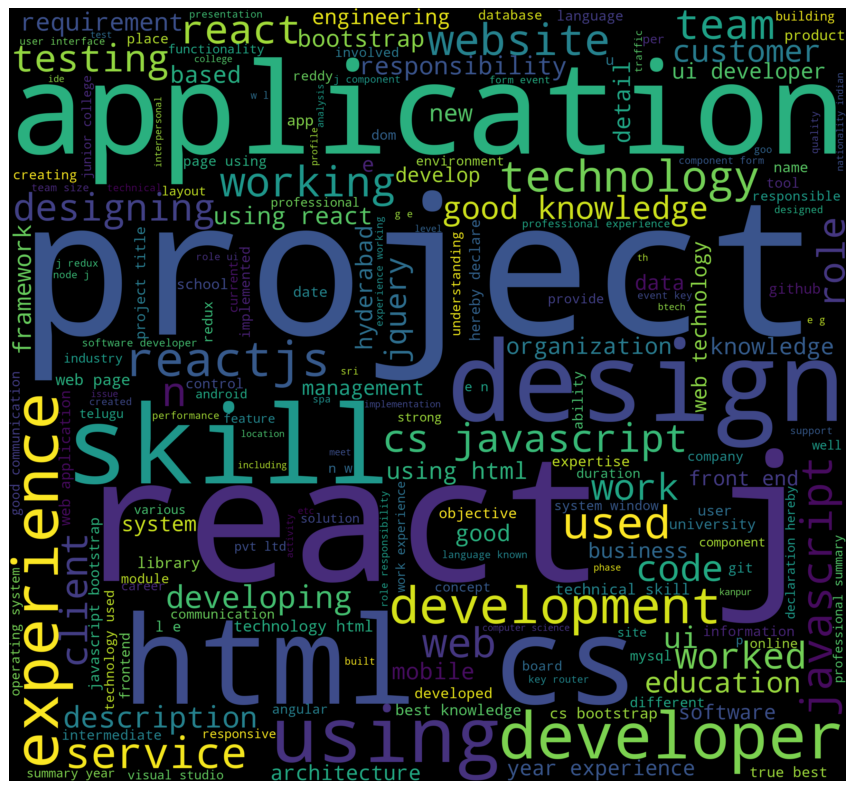

In [22]:
react_string=" ".join(resume_data[resume_data['Category']=='ReactJSDeveloper'].Resume_Text.values)
wordcloud_resume = WordCloud(
                      background_color='black',
                      width=2600,
                      height=2400
                     ).generate(react_string)

plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordcloud_resume, interpolation = "bilinear")
plt.axis("off")
plt.show()

### Workday Word Cloud

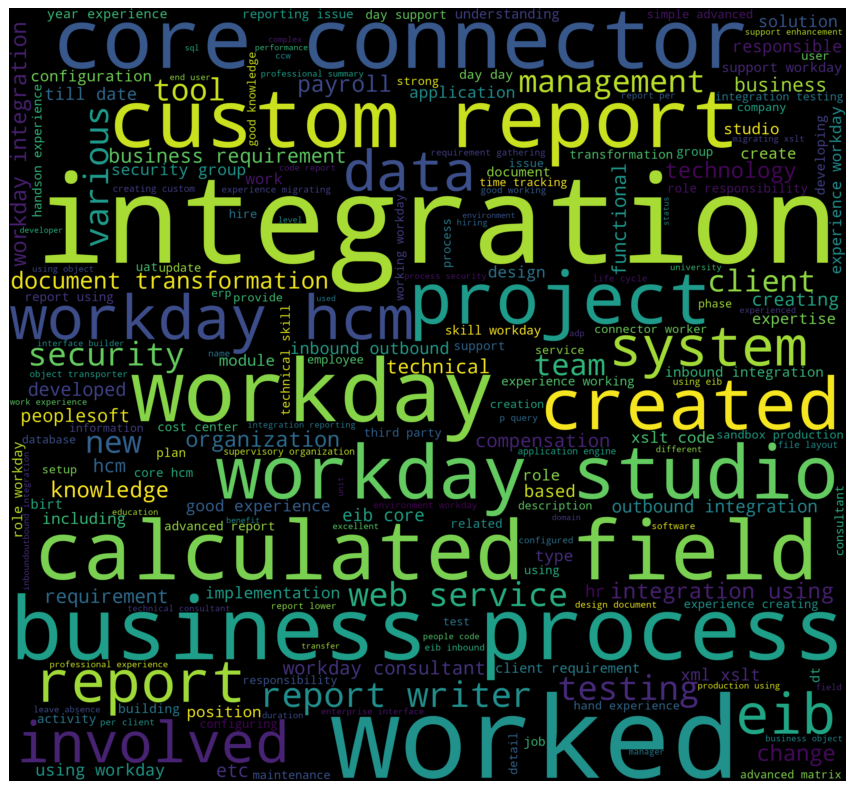

In [23]:
workday_string = " ".join(resume_data[resume_data['Category']=='WorkDay'].Resume_Text.values)
wordcloud_resume = WordCloud(
                      background_color='black',
                      width=2600,
                      height=2400
                     ).generate(workday_string)

plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordcloud_resume, interpolation = "bilinear")
plt.axis("off")
plt.show()

### SQL Developer Word Cloud

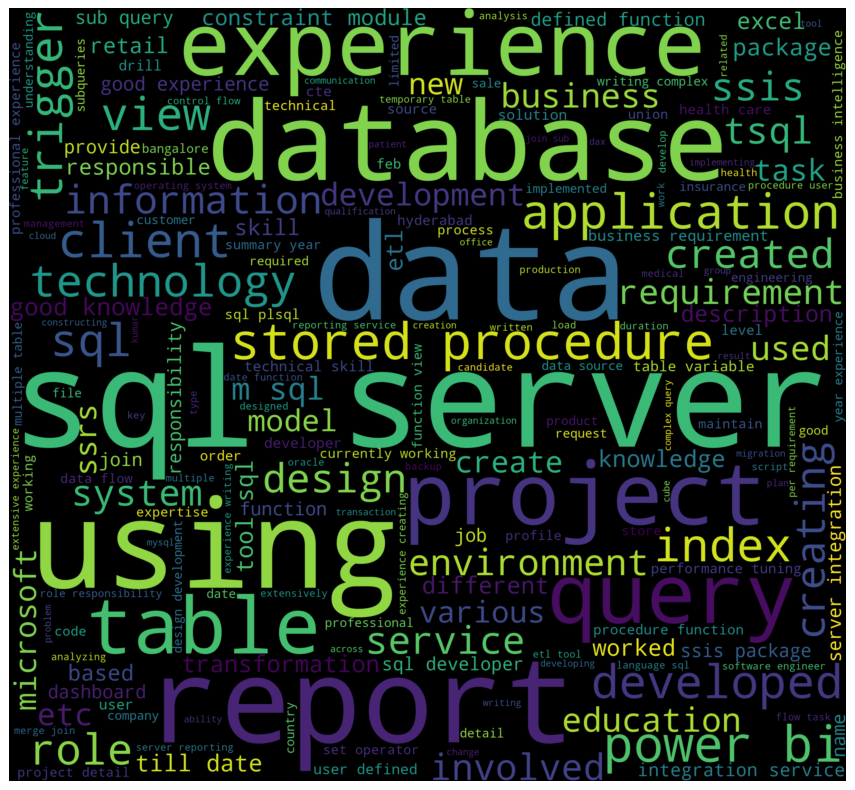

In [24]:
sql_string = " ".join(resume_data[resume_data['Category']=='SQLDeveloper'].Resume_Text.values)
wordcloud_resume = WordCloud(
                      background_color='black',
                      width=2600,
                      height=2400
                     ).generate(sql_string)

plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordcloud_resume, interpolation = "bilinear")
plt.axis("off")
plt.show()

### Peoplesoft Word Cloud

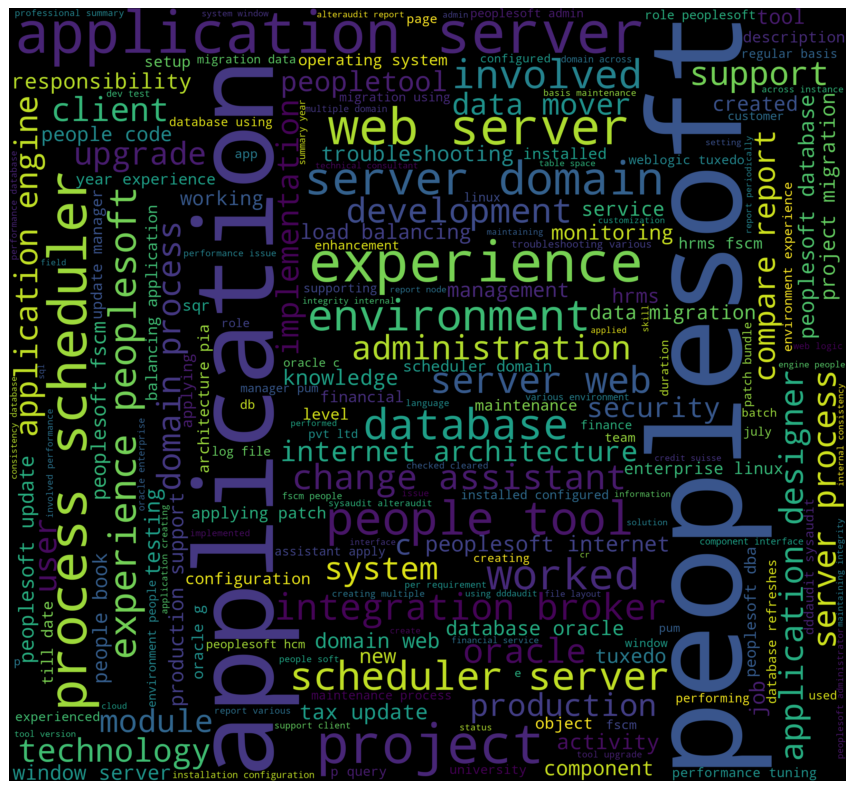

In [25]:
peoplesoft_string = " ".join(resume_data[resume_data['Category']=='PeopleSoft'].Resume_Text.values)
wordcloud_resume = WordCloud(
                      background_color='black',
                      width=2600,
                      height=2400
                     ).generate(peoplesoft_string)

plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordcloud_resume, interpolation = "bilinear")
plt.axis("off")
plt.show()

## Categorical Column Data Type Conversion

In [26]:
# Categorical Column
resume_data.Category.value_counts()

ReactJSDeveloper    24
WorkDay             21
PeopleSoft          20
SQLDeveloper        14
Name: Category, dtype: int64

In [27]:
#We have 4 categories
#We have to convert Category column from string to numerical using Label Encoder

label_encoder = preprocessing.LabelEncoder()
resume_data['Category']=label_encoder.fit_transform(resume_data['Category'])
resume_data.Category.unique()

array([0, 1, 2, 3])

In [28]:
resume_data.to_csv("Cleaned_Resume_Data.csv",index=False)